In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import pandas as pd
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [12]:
pwd

'd:\\Engineering\\MBS\\Car classifier'

In [21]:
list_classes = pd.read_csv("car_data/names.csv")
list_classes

,names:
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
...,...
191,Volkswagen Beetle Hatchback 2012
192,Volvo C30 Hatchback 2012
193,Volvo 240 Sedan 1993
194,Volvo XC90 SUV 2007


In [25]:
class_list = list_classes.values.tolist()

In [45]:
class_list
new_list = []
for i in range(int(len(class_list))):
    r = class_list[i]
    new_list.append(r[0])


In [20]:
train_path = 'car_data/train'
valid_path = 'car_data/valid'
test_path = 'car_data/test'

In [60]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes= new_list, batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224),classes= new_list, batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224),classes= new_list, batch_size=10, shuffle=False)

Found 6444 images belonging to 196 classes.
Found 1546 images belonging to 196 classes.
Found 8000 images belonging to 196 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

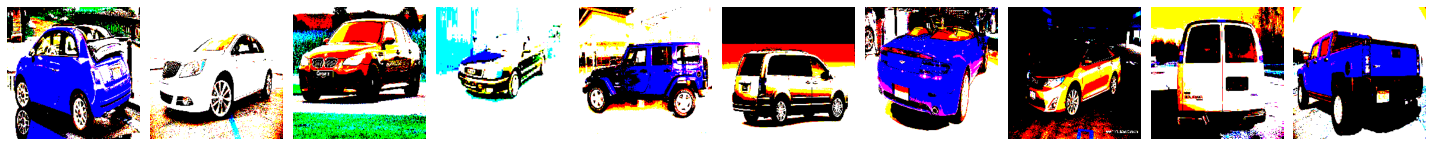

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [47]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 813s 1us/step


In [62]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [63]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [64]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)


In [65]:
for layer in model.layers:
    layer.trainable = False

In [66]:
model.add(Dense(units=196, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [68]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2
)

Epoch 1/10
645/645 - 1567s - loss: 4.6736 - accuracy: 0.0774 - val_loss: 3.8762 - val_accuracy: 0.1391
Epoch 2/10
645/645 - 1547s - loss: 2.8071 - accuracy: 0.3363 - val_loss: 3.4774 - val_accuracy: 0.2160
Epoch 3/10
645/645 - 1573s - loss: 2.0718 - accuracy: 0.5185 - val_loss: 3.3216 - val_accuracy: 0.2406
Epoch 4/10
645/645 - 1542s - loss: 1.5927 - accuracy: 0.6505 - val_loss: 3.2283 - val_accuracy: 0.2555
Epoch 5/10
645/645 - 1535s - loss: 1.2421 - accuracy: 0.7582 - val_loss: 3.1653 - val_accuracy: 0.2755
Epoch 6/10
645/645 - 1533s - loss: 0.9813 - accuracy: 0.8347 - val_loss: 3.1611 - val_accuracy: 0.2820
Epoch 7/10
645/645 - 1538s - loss: 0.7792 - accuracy: 0.8852 - val_loss: 3.1452 - val_accuracy: 0.2917
Epoch 8/10
645/645 - 1533s - loss: 0.6191 - accuracy: 0.9266 - val_loss: 3.1616 - val_accuracy: 0.3060
Epoch 9/10
645/645 - 1530s - loss: 0.4938 - accuracy: 0.9550 - val_loss: 3.1562 - val_accuracy: 0.3060
Epoch 10/10
645/645 - 1535s - loss: 0.3902 - accuracy: 0.9725 - val_loss:

In [72]:
model.save('vggmodel.h5')